# LAB 9

In [18]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import Perceptron
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import sklearn
import tensorflow as tf
import numpy as np


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

In [5]:
data = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [7]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


All attributes are numerical, except the ocean_proximity field.

In [8]:
#This method shows a statistical summary of the numerical attributes 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


In [6]:
#Use top 4 features for each of the Classes (8 total features) drop the rest
#1-WindChill, Humidity, Temperature, Visibility
#2-WindChill, WindSpeed, Humidity, Distance
#3-WindChill, WindSpeed, Distance(mi), Pressure(Air)
#4-Distance, Temperature, Wind_Chill(F), Humidity
df2 = data.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
#df2 = data.filter(['Severity','Distance(mi)','Visibility(mi)'])
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,2,NaN,36.9,91.0,NaN,0.747,29.68,10.0,91.0
2,2,NaN,36.0,97.0,NaN,0.055,29.70,10.0,97.0
3,2,NaN,39.0,55.0,NaN,0.123,29.65,10.0,55.0
4,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
...,...,...,...,...,...,...,...,...,...
2845337,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2845338,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2845339,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2845340,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [7]:
df2 = df2.dropna()
df2 = df2.reset_index(drop = True)
df2

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,3,36.1,42.1,58.0,10.4,3.230,29.76,10.0,58.0
1,3,29.8,37.0,93.0,10.4,0.500,29.69,10.0,93.0
2,2,29.2,35.6,100.0,8.1,1.427,29.66,10.0,100.0
3,2,30.0,33.1,92.0,3.5,0.521,29.63,0.5,92.0
4,2,31.8,39.0,70.0,11.5,0.491,29.59,10.0,70.0
...,...,...,...,...,...,...,...,...,...
2363634,2,86.0,86.0,40.0,13.0,0.543,28.92,10.0,40.0
2363635,2,70.0,70.0,73.0,6.0,0.338,29.39,10.0,73.0
2363636,2,73.0,73.0,64.0,10.0,0.561,29.74,10.0,64.0
2363637,2,71.0,71.0,81.0,8.0,0.772,29.62,10.0,81.0


In [8]:
from sklearn.utils import resample

sev1 = df2[df2["Severity"] == 1]
sev2 = df2[df2["Severity"] == 2]
sev3 = df2[df2["Severity"] == 3]
sev4 = df2[df2["Severity"] == 4]
#df2_upsample = resample(spam_messages,
#             replace=True,
#             n_samples=len(ham_messages),
#             random_state=42)

print(sev1.shape)
print(sev2.shape)
print(sev3.shape)
print(sev4.shape)


(25539, 9)
(2179716, 9)
(80936, 9)
(77448, 9)


<AxesSubplot:ylabel='Type'>

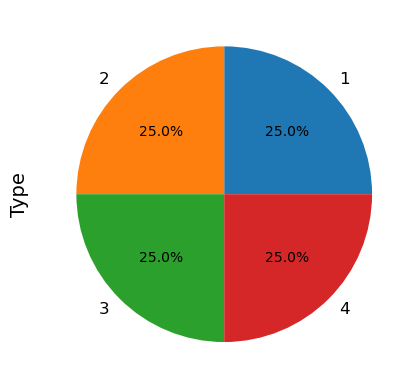

In [9]:
sev2_downsample = resample(sev2,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
sev3_downsample = resample(sev3,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
sev4_downsample = resample(sev4,
             replace=True,
             n_samples=len(sev1),
             random_state=42)
# print(sev4_downsample.shape)
# print(sev2.shape)
# print(sev2_downsample)
# print(sev4_downsample)

# data_upsampled = pd.concat([, spam_upsample])
pdList = [sev1,sev2_downsample,sev3_downsample,sev4_downsample]
df2_downsampled = pd.concat(pdList)
df2_downsampled.groupby('Severity').size().plot(kind='pie',
                                       y = "Severity",
                                       label = "Type",
                                       autopct='%1.1f%%')


In [10]:
df2_downsampled.Severity.value_counts()

1    25539
2    25539
3    25539
4    25539
Name: Severity, dtype: int64

# Perceptron

In [108]:
testData1 = df2_downsampled.copy()

In [128]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([2],1)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

In [129]:
testData1 = df2_downsampled.filter(['Severity','Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)','Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Humidity(%)'])
#df2 = data.filter(['Severity','Distance(mi)','Visibility(mi)'])
testData1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
1493785,1,103.0,103.0,22.0,10.0,0.000,27.15,10.0,22.0
1495315,1,95.0,95.0,19.0,10.0,0.000,27.16,10.0,19.0
1507378,1,68.0,68.0,93.0,5.0,0.000,29.14,9.0,93.0
1509407,1,98.0,98.0,18.0,5.0,0.000,28.28,10.0,18.0
1510895,1,95.0,95.0,22.0,9.0,0.000,29.90,10.0,22.0
...,...,...,...,...,...,...,...,...,...
2001548,4,72.0,72.0,46.0,10.0,0.000,29.49,10.0,46.0
1874389,4,68.0,68.0,87.0,0.0,2.391,29.57,3.0,87.0
23230,4,21.2,26.6,85.0,4.6,0.880,30.35,10.0,85.0
14078,4,38.4,42.1,40.0,5.8,0.383,30.31,10.0,40.0


In [139]:
testData1['Severity'] = testData1['Severity'].replace([1],0)
testData1['Severity'] = testData1['Severity'].replace([2],1)
testData1['Severity'] = testData1['Severity'].replace([3],0)
testData1['Severity'] = testData1['Severity'].replace([4],0)

In [140]:
testData1 = testData1.dropna()
testData1 = testData1.reset_index(drop = True)
testData1

,Severity,Wind_Chill(F),Temperature(F),Humidity(%),Wind_Speed(mph),Distance(mi),Pressure(in),Visibility(mi),Humidity(%)
0,0,103.0,103.0,22.0,10.0,0.000,27.15,10.0,22.0
1,0,95.0,95.0,19.0,10.0,0.000,27.16,10.0,19.0
2,0,68.0,68.0,93.0,5.0,0.000,29.14,9.0,93.0
3,0,98.0,98.0,18.0,5.0,0.000,28.28,10.0,18.0
4,0,95.0,95.0,22.0,9.0,0.000,29.90,10.0,22.0
...,...,...,...,...,...,...,...,...,...
102151,0,72.0,72.0,46.0,10.0,0.000,29.49,10.0,46.0
102152,0,68.0,68.0,87.0,0.0,2.391,29.57,3.0,87.0
102153,0,21.2,26.6,85.0,4.6,0.880,30.35,10.0,85.0
102154,0,38.4,42.1,40.0,5.8,0.383,30.31,10.0,40.0


In [141]:
X = testData1.iloc[:, 7:]
y = testData1.iloc[:, 0]
y

0         0
1         0
2         0
3         0
4         0
         ..
102151    0
102152    0
102153    0
102154    0
102155    0
Name: Severity, Length: 102156, dtype: int64

In [142]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [143]:
y_pred = per_clf.predict([[10, 97]]) # make prediction for new instance 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


In [144]:
per_clf.score(X, y)

0.75

In [145]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {
              "Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [146]:
cross_validation(Perceptron(max_iter=1000, tol=1e-3, random_state=42), X, y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is i

{'Training Accuracy scores': array([0.25088101, 0.33504459, 0.30090276, 0.2501849 , 0.32458125,
        0.2780074 , 0.74999184, 0.75000272, 0.25583798, 0.75000272]),
 'Mean Training Accuracy': 42.454371782111814,
 'Training Precision scores': array([0.25016061, 0.25305837, 0.24826241, 0.25003536, 0.26292565,
        0.25591441, 0.        , 0.        , 0.25130277, 0.        ]),
 'Mean Training Precision': 0.17716595800999912,
 'Training Recall scores': array([0.99952143, 0.8504677 , 0.88579508, 0.99991299, 0.9436154 ,
        0.98973243, 0.        , 0.        , 0.9986948 , 0.        ]),
 'Mean Training Recall': 0.6667739830324125,
 'Training F1 scores': array([0.40016722, 0.39005507, 0.38782799, 0.40003829, 0.41125943,
        0.40667513, 0.        , 0.        , 0.40156041, 0.        ]),
 'Mean Training F1 Score': 0.2797583542904744,
 'Validation Accuracy scores': array([0.25107674, 0.39271731, 0.26889193, 0.25      , 0.26908771,
        0.25303446, 0.75007342, 0.74997553, 0.25022026, 0

In [147]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score

df_reviews = pd.read_excel("https://github.com/grahamharrison68/Public-Github/blob/master/Analyzing%20Customer%20Feedback/data/out/Womens%20Clothing%20E-Commerce%20Reviews%20with%20Emotions.xlsx?raw=true")
    
df_reviews.dropna(inplace=True) 
df_reviews.reset_index(drop=True, inplace=True)


model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=10)

print(cv_results.mean(), cv_results.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................................ score: (test=0.275) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.748) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.284) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.338) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.256) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.292) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [148]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

In [149]:
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

import seaborn as sns
from typing import Tuple
from sklearn.metrics import confusion_matrix

In [150]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

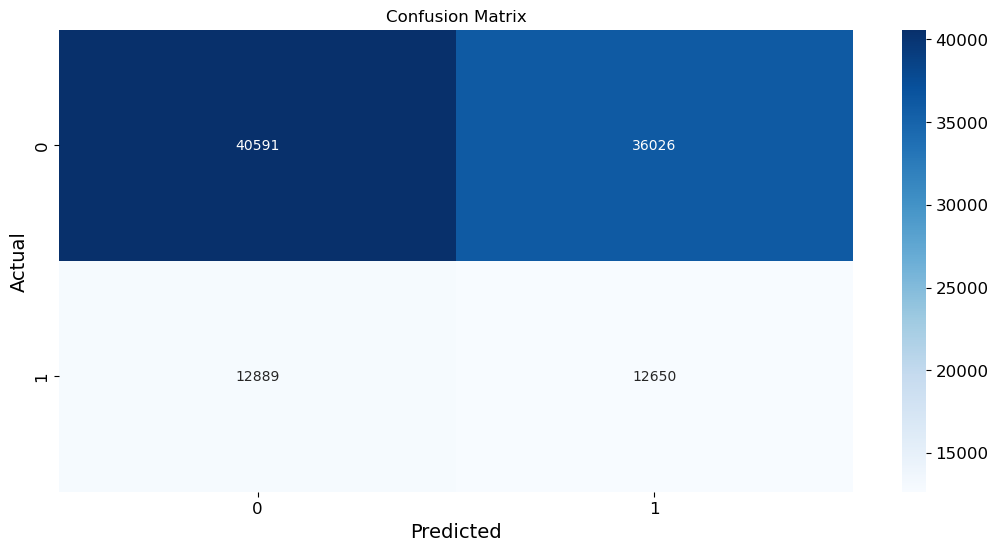

In [155]:
actual_classes, predicted_classes, _ = cross_val_predict(model, kfold, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])